In [13]:
from google.oauth2 import service_account
from google.cloud import bigquery
from google.cloud.exceptions import NotFound
import pandas as pd
from google.cloud import storage
import matplotlib.pyplot as plt
import numpy as np

In [2]:
project_id = "looker-assignment-113356033"
dataset_id = "final_project_dataset"

In [3]:
crendentials = service_account.Credentials.from_service_account_file(r"C:\nccu\workspace\dataModel_finalProjrct\looker-assignment-113356033-4959799503ac.json")

In [4]:
bigquery_client = bigquery.Client(project=project_id, credentials=crendentials)
storage_client = storage.Client(credentials=crendentials, project=project_id)

In [9]:
google_trends_query = """
SELECT
    date,
    SHIB,
    PEPE,
    BONK,
    FLOKI,
    MOG
FROM `looker-assignment-113356033.final_project_dataset.google_trends_data`
ORDER BY date
"""

google_trends_data = bigquery_client.query(google_trends_query).to_dataframe() 

C:\Users\wise\AppData\Roaming\Python\Python312\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [10]:
google_trends_data

,date,SHIB,PEPE,BONK,FLOKI,MOG
0,2024-01-01,3,94,10,4,13
1,2024-01-02,5,84,16,4,10
2,2024-01-03,4,81,13,3,11
3,2024-01-04,4,80,10,3,11
4,2024-01-05,3,83,10,4,12
...,...,...,...,...,...,...
357,2024-12-23,2,74,4,3,7
358,2024-12-24,3,67,5,3,8
359,2024-12-25,2,67,5,4,9
360,2024-12-26,2,63,4,4,7


In [15]:
price_volume_historical_query = """
SELECT
    date,
    token_id,
    price,
    trading_volume
FROM `looker-assignment-113356033.final_project_dataset.historical_data`
ORDER BY date
"""

price_volume_historical_data = bigquery_client.query(price_volume_historical_query).to_dataframe() 

C:\Users\wise\AppData\Roaming\Python\Python312\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [16]:
price_volume_historical_data

,date,token_id,price,trading_volume
0,2024-01-01,shiba-inu,1.033106e-05,8.470002e+07
1,2024-01-01,pepe,1.286294e-06,4.102251e+07
2,2024-01-01,bonk,1.333829e-05,9.031495e+07
3,2024-01-01,floki,3.489902e-05,1.284963e+07
4,2024-01-01,mog-coin,4.011771e-08,7.442408e+05
...,...,...,...,...
25022,2024-12-21,bird-dog,2.164001e-05,3.972554e+05
25023,2024-12-21,fleabone,2.138563e-05,7.829474e+04
25024,2024-12-21,byte,8.986425e-06,1.770963e+05
25025,2024-12-21,i-love-puppies,2.139084e-07,5.920816e+05


In [17]:
trends_volumePrice_merged = pd.merge(google_trends_data, price_volume_historical_data, on="date", how="inner")
trends_volumePrice_merged

,date,SHIB,PEPE,BONK,FLOKI,MOG,token_id,price,trading_volume
0,2024-01-01,3,94,10,4,13,shiba-inu,1.033106e-05,8.470002e+07
1,2024-01-01,3,94,10,4,13,pepe,1.286294e-06,4.102251e+07
2,2024-01-01,3,94,10,4,13,bonk,1.333829e-05,9.031495e+07
3,2024-01-01,3,94,10,4,13,floki,3.489902e-05,1.284963e+07
4,2024-01-01,3,94,10,4,13,mog-coin,4.011771e-08,7.442408e+05
...,...,...,...,...,...,...,...,...,...
25022,2024-12-21,3,72,6,4,7,bird-dog,2.164001e-05,3.972554e+05
25023,2024-12-21,3,72,6,4,7,fleabone,2.138563e-05,7.829474e+04
25024,2024-12-21,3,72,6,4,7,byte,8.986425e-06,1.770963e+05
25025,2024-12-21,3,72,6,4,7,i-love-puppies,2.139084e-07,5.920816e+05


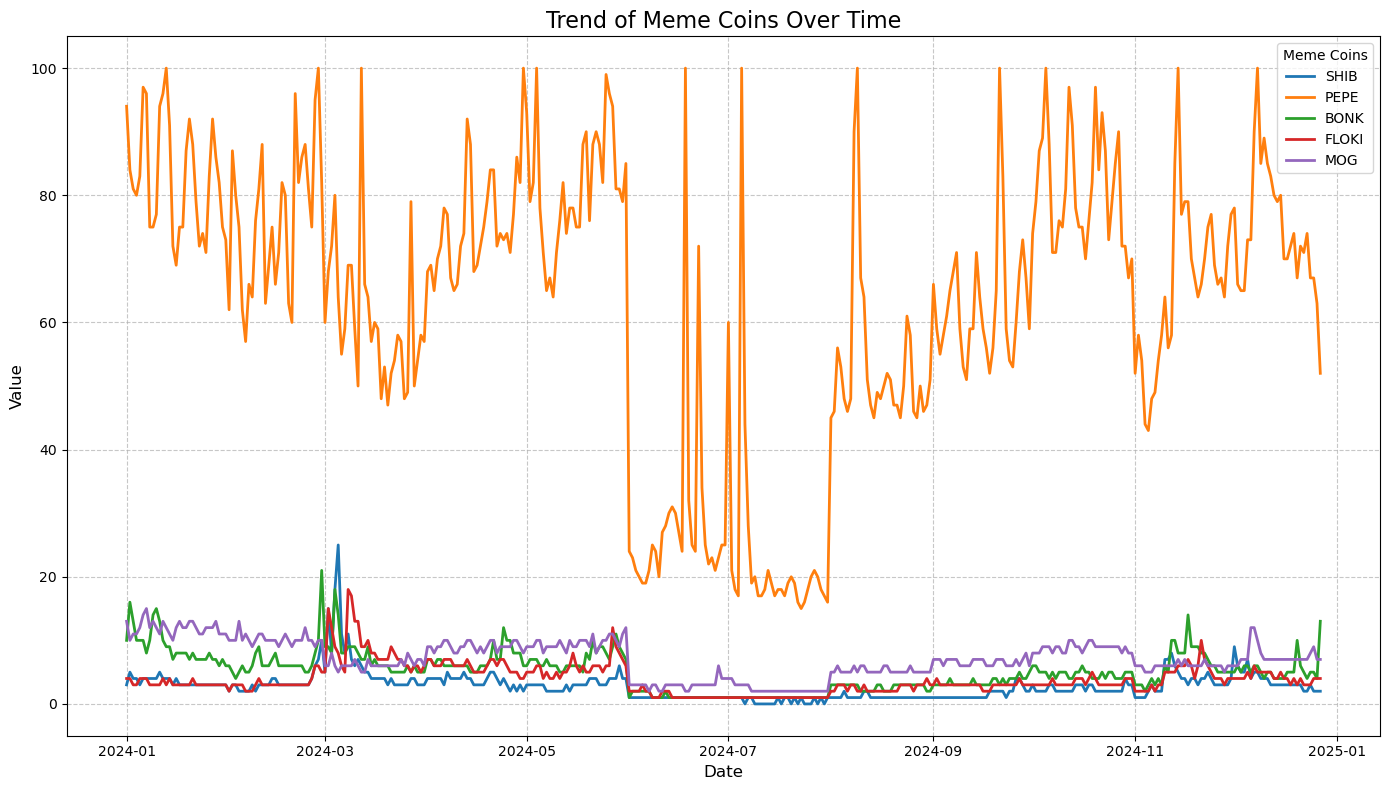

In [12]:
# 繪製折線圖
plt.figure(figsize=(14, 8))
for coin in ['SHIB', 'PEPE', 'BONK', 'FLOKI', 'MOG']:
    plt.plot(google_trends_data['date'], google_trends_data[coin], label=coin, linewidth=2)

# 添加標題和軸標籤
plt.title("Trend of Meme Coins Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)

# 添加圖例和網格
plt.legend(title="Meme Coins")
plt.grid(True, linestyle='--', alpha=0.7)

# 調整圖表佈局
plt.tight_layout()

# 顯示圖表
plt.show()

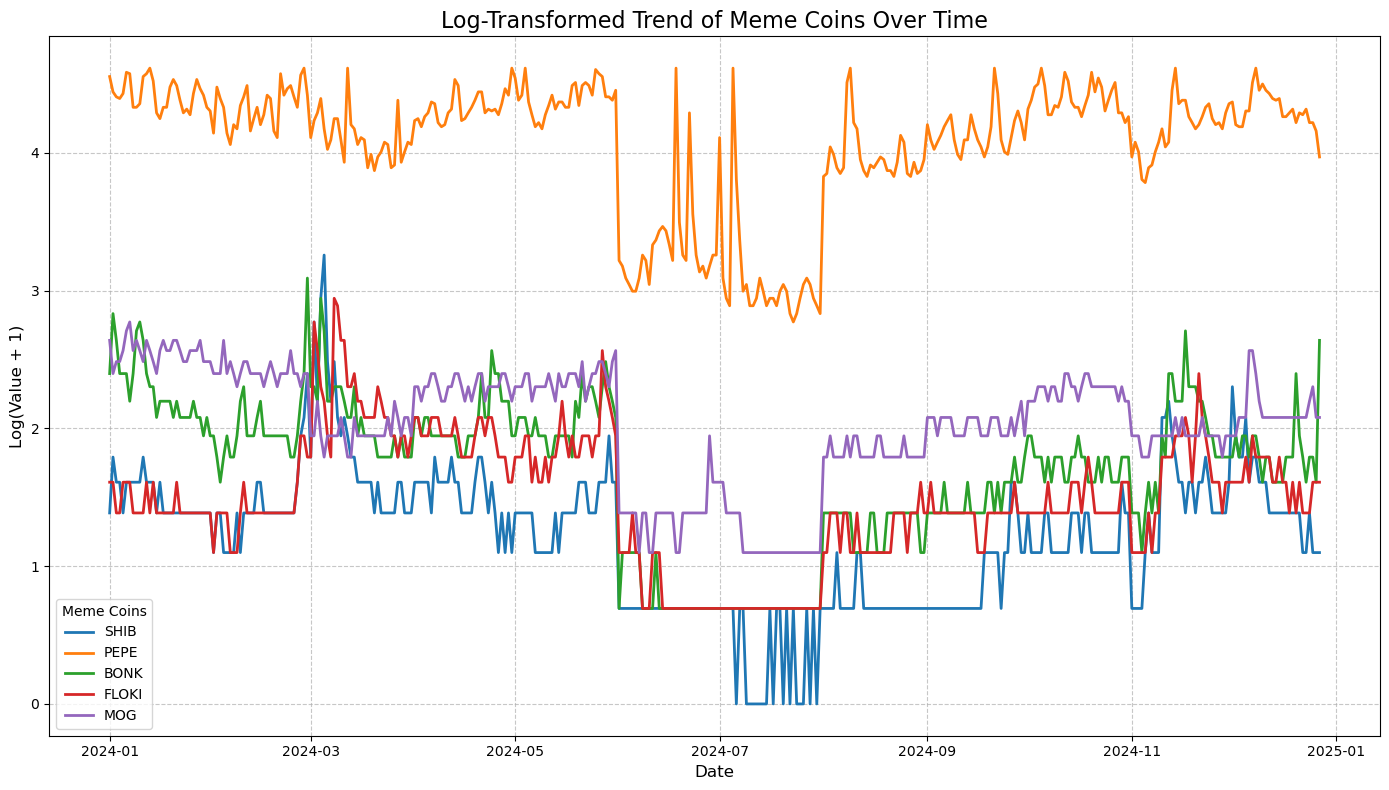

In [14]:
# 對數變換（避免 log(0) 錯誤，將值 +1）
google_trends_data_log = google_trends_data.copy()
for coin in ['SHIB', 'PEPE', 'BONK', 'FLOKI', 'MOG']:
    google_trends_data_log[coin] = np.log1p(google_trends_data[coin])  # log1p(x) 等於 log(x+1)
# 繪製折線圖
plt.figure(figsize=(14, 8))
for coin in ['SHIB', 'PEPE', 'BONK', 'FLOKI', 'MOG']:
    plt.plot(google_trends_data_log['date'], google_trends_data_log[coin], label=coin, linewidth=2)

# 添加標題和軸標籤
plt.title("Log-Transformed Trend of Meme Coins Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Log(Value + 1)", fontsize=12)

# 添加圖例和網格
plt.legend(title="Meme Coins")
plt.grid(True, linestyle='--', alpha=0.7)

# 調整圖表佈局
plt.tight_layout()

# 顯示圖表
plt.show()